In [37]:
def D_exponential(b,N):
    return np.log(np.random.random(N))/(-1/b)

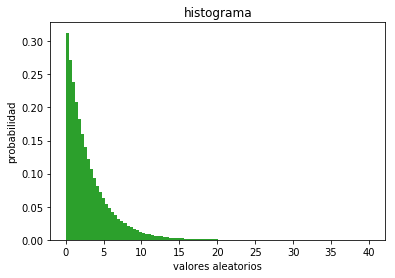

3.00074952415


In [45]:
import numpy as np
import matplotlib.pyplot as plt
b = 3
N = 10**6
x = np.random.exponential(b,N)
x2 = np.log(1-np.random.random(N))/(-1/b)
plt.hist(x,100,normed=True)
plt.xlabel('valores aleatorios')
plt.ylabel('probabilidad')
plt.title('histograma')
plt.show()
print(np.mean(x))

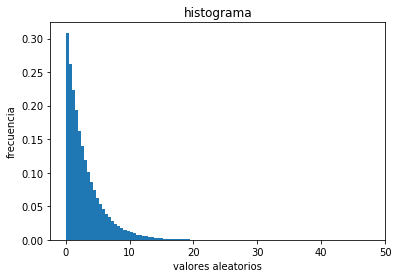

In [13]:
plt.hist(x2,100,normed=True)
plt.xlabel('valores aleatorios')
plt.ylabel('probabilidad')
plt.title('histograma')
plt.show()

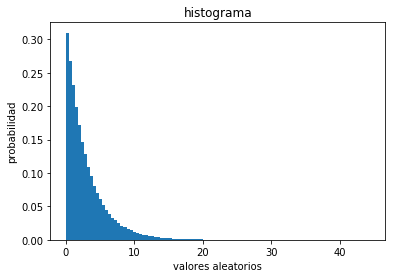

In [15]:
x3 = np.log(np.random.random(N))/(-1/b)
plt.hist(x3,100,normed=True)
plt.xlabel('valores aleatorios')
plt.ylabel('probabilidad')
plt.title('histograma')
plt.show()

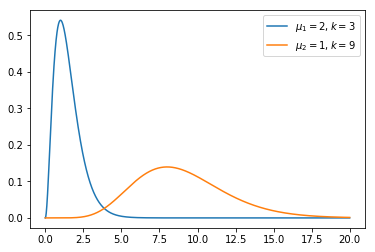

In [36]:
# Erlang
from math import factorial as fact
mu = 2; k = 3
f = lambda t:((mu)**k/fact((k-1)))*t**(k-1)*np.exp(-mu*t)
t = np.arange(0,20,0.01)
f1 = f(t)
plt.plot(t,f1,label='$\mu_1=2,k=3$')
mu = 1; k = 9
f2 = f(t)
plt.plot(t,f2,label='$\mu_2=1,k=9$')
plt.legend()
plt.show()

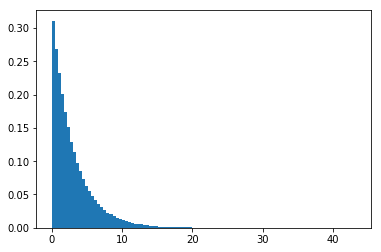

In [49]:
def D_erlang(mu,k):
    
e = D_exponential(b,N)
plt.hist(e,100,normed=True)
plt.show()